In [73]:
import pandas as pd
import scipy.stats
import numpy as np
import time
import matplotlib.pyplot as plt
from colorama import Fore
import scipy.stats as sps
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [74]:
data = pd.read_csv('548Var_FinalDF.csv')
# after first two week is 38511
# till before the last two month is 833506

In [75]:
mydata = data[data['record'] > 38510]

In [76]:
mydata = mydata[mydata['record'] < 833507]

In [77]:
goods = mydata[mydata['fraud_label'] == 0]
bads = mydata[mydata['fraud_label'] == 1]

In [78]:
KSFDR = pd.DataFrame()

In [79]:
column_list = list(mydata.columns)

In [80]:
for var in column_list:
  KSFDR.loc[var,'ks'] = sps.ks_2samp(goods[var],bads[var])[0]

In [81]:
topRows = int(round(len(mydata)*0.03))
numbads = bads.shape[0]
for var in column_list:
  temp = mydata[[var,'fraud_label']]
  temp.columns = [var,'fraud_label1']
  temp.sort_values(var,ascending=True,inplace=True)
  temp1 = temp.head(topRows)
  temp2 = temp.tail(topRows)
  needed1 = temp1.iloc[:,1]
  needed2 = temp2.iloc[:,1]
  FDR1 = sum(needed1)/numbads
  FDR2 = sum(needed2)/numbads
  FDRate = np.maximum(FDR1,FDR2)
  KSFDR.loc[var,'FDR'] = FDRate

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
# Calculate the average rank of KS and FDR 
KSFDR['rank_ks'] = KSFDR['ks'].rank(ascending=True)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending=True)
KSFDR['avg_rank'] = (KSFDR['rank_ks']+KSFDR['rank_FDR'])/2
KSFDR.sort_values(by=['avg_rank'],ascending=False,inplace=True)

In [83]:
KSFDR.reset_index(inplace=True)

In [84]:
KSFDR.head(10)

,index,ks,FDR,rank_ks,rank_FDR,avg_rank
0,fraud_label,1.000000,1.000000,549.0,549.0,549.0
1,address_zip5_count30_date,0.332088,0.354052,547.0,548.0,547.5
2,address_count30_date,0.332780,0.352747,548.0,547.0,547.5
3,address_zip5_pastday,0.324415,0.350135,545.0,546.0,545.5
4,address_pastday,0.325551,0.349961,546.0,545.0,545.5
5,address_count14_date,0.322309,0.345521,544.0,543.0,543.5
6,address_count90_date,0.321145,0.345695,542.0,544.0,543.0
7,address_zip5_count14_date,0.321813,0.343083,543.0,540.0,541.5
8,address_count180_date,0.319290,0.344563,540.0,542.0,541.0
9,address_zip5_count90_date,0.320314,0.343171,541.0,541.0,541.0


In [85]:
KSFDR.to_csv("FDR.csv")

In [86]:
# wrapper

In [87]:
# Pick top 80 variables, besides fraud_label, and feed them into wrapper 
var_list = KSFDR.iloc[:81,0]
print(len(var_list))

81


In [88]:
var_list

0                                      fraud_label
1                        address_zip5_count30_date
2                             address_count30_date
3                             address_zip5_pastday
4                                  address_pastday
                          ...                     
76         ssn_firstname_lastname_dob_count14_date
77                       ssn_lastname_count14_date
78             ssn_firstname_lastname_count14_date
79                   ssn_dob_0_count30_count_ratio
80    firstname_lastname_dob_0_count30_count_ratio
Name: index, Length: 81, dtype: object

In [89]:
cand_var1 = mydata.loc[:,var_list]

In [90]:
# RFECV: feature ranking with recursive feature elimination and cross-validated selection of the best number of features
# First round wrapper
model = LogisticRegression()
X = cand_var1.iloc[:,1:]
y = cand_var1.iloc[:,0]
rfecv1 = RFECV(estimator=model,step=1,cv=2,verbose=3,n_jobs=-1,scoring='roc_auc')
output1 = rfecv1.fit(X,y)

Fitting estimator with 80 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 79 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 78 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 77 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 76 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 75 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 74 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 73 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 72 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 71 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 70 features.
Fitting estimator with 69 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 68 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 67 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 66 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 65 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 64 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 63 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 62 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 61 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 60 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 59 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 58 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 57 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 56 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
print(f'Number of variables selected: {output1.get_support().sum()}')

Number of variables selected: 55


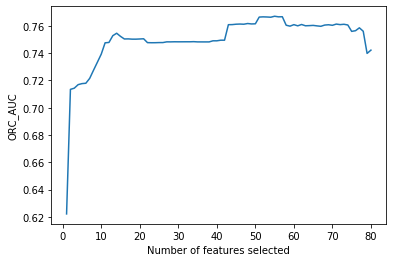

In [92]:
# Plot the wrapper
plt.figure()
plt.plot(range(1,len(rfecv1.grid_scores_)+1),rfecv1.grid_scores_)
plt.xlabel('Number of features selected')
plt.ylabel('ORC_AUC')
plt.show()

In [93]:
# Pick the 34 variables selected by the wrapper
var_list2 = list(var_list).copy()
var_list2.remove('fraud_label')
var_list2 = np.array(var_list2)[output1.get_support()]
print(len(var_list2))

55


In [94]:
cand_var2 = mydata.loc[:,var_list2]
cand_var2['fraud_label'] = mydata.loc[:,'fraud_label']

In [95]:
# Second round wrapper
model = LogisticRegression()
X = cand_var2.iloc[:,:34]
y = cand_var2.loc[:,'fraud_label']
rfecv2 = RFECV(estimator=model,step=1,cv=4,verbose=3,n_jobs=-1,scoring='roc_auc')
output2 = rfecv2.fit(X,y)

Fitting estimator with 34 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 33 features.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
print(f'Number of variables selected: {output2.get_support().sum()}')

Number of variables selected: 32


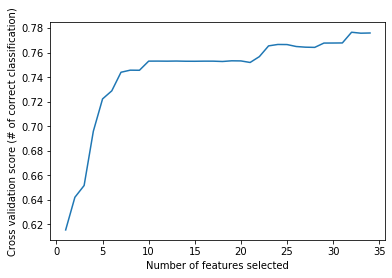

In [97]:
# Plot the wrapper
plt.figure()
plt.plot(range(1,len(rfecv2.grid_scores_)+1),rfecv2.grid_scores_)
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (# of correct classification)')
plt.show()

In [98]:
output2.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

In [99]:
# Selected top variables 
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), output2.ranking_), cand_var2.columns)),columns = ['ranking', 'variable'])
var_selected

,ranking,variable
0,1,address_0_count14_count_ratio
1,1,address_0_count180_count_ratio
2,1,address_0_count30_count_ratio
3,1,address_0_count3_count_ratio
4,1,address_0_count7_count_ratio
5,1,address_0_count90_count_ratio
6,1,address_count14_date
7,1,address_count1_date
8,1,address_count30_date
9,1,address_count3_date
